In [48]:
 !pip install torch torchvision torchaudio

In [ ]:
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # Change the input channels to 3
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x=x.view(-1,self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
net = LeNet()



In [ ]:
# test the model
net= LeNet()
print(net)
input= torch.randn(1,1,32,32)
print(input.size())
out = net(input)
print(out)
print(out.size())

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
torch.Size([1, 1, 32, 32])
tensor([[ 0.0243,  0.1477, -0.1777,  0.0696,  0.0927, -0.1901, -0.0611, -0.0041,
         -0.0466,  0.0708]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


In [ ]:

from torch.utils.data import DataLoader, TensorDataset


In [ ]:
from torch.utils.data import ConcatDataset
from torchvision import transforms
import torchvision
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,

download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,

download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,

shuffle=True, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# print the mean and standard deviation
print(trainset.data.mean(axis=(0,1,2))/255)
print(trainset.data.std(axis=(0,1,2))/255)

[0.49139968 0.48215841 0.44653091]
[0.24703223 0.24348513 0.26158784]


 ship plane   cat  bird


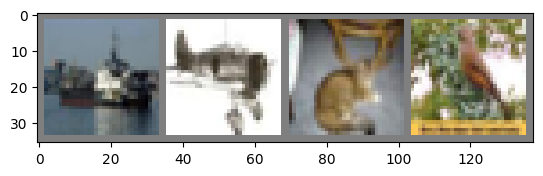

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
criterior= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# trainning the lenet model
for epoch in range(2):
    # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterior(outputs, labels)
        loss.backward()
        optimizer.step()
        # rpinting the current statastics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')


[1,  2000] loss: 2.304
[1,  4000] loss: 2.305
[1,  6000] loss: 2.305
[1,  8000] loss: 2.306
[1, 10000] loss: 2.305
[1, 12000] loss: 2.304
[2,  2000] loss: 2.304
[2,  4000] loss: 2.305
[2,  6000] loss: 2.304
[2,  8000] loss: 2.305
[2, 10000] loss: 2.305
[2, 12000] loss: 2.305
Finished Training


In [ ]:
correct = 0
total = 0
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %


# Torch basic operations

In [49]:
x = torch.empty(2, 2, 3)
print(x.shape)
print(x)

empty_like_x = torch.empty_like(x)
print(empty_like_x.shape)
print(empty_like_x)

zeros_like_x = torch.zeros_like(x)
print(zeros_like_x.shape)
print(zeros_like_x)

ones_like_x = torch.ones_like(x)
print(ones_like_x.shape)
print(ones_like_x)

rand_like_x = torch.rand_like(x)
print(rand_like_x.shape)
print(rand_like_x)

torch.Size([2, 2, 3])
tensor([[[ 7.9020e+00,  4.4633e-41,  1.2681e+37],
         [ 3.3310e-41,  4.7785e+33,  3.3310e-41]],

        [[ 0.0000e+00,  0.0000e+00,  3.8019e+37],
         [ 3.3310e-41, -9.5880e+29,  4.4631e-41]]])
torch.Size([2, 2, 3])
tensor([[[-5.3545e-09,  3.3314e-41,  1.4013e-45],
         [ 0.0000e+00,  2.6611e+36,  3.3310e-41]],

        [[ 8.1275e-44,  3.3310e-41,  6.8877e-41],
         [ 0.0000e+00,  1.0089e-43,  3.3310e-41]]])
torch.Size([2, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([2, 2, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])
torch.Size([2, 2, 3])
tensor([[[0.7226, 0.9187, 0.6895],
         [0.5981, 0.3635, 0.3738]],

        [[0.3243, 0.3797, 0.7479],
         [0.8664, 0.5660, 0.5030]]])


In [50]:
some_contant=torch.tensor([[1,2,3],[4,5,6]])
print(some_contant)
print(some_contant.shape)

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])


In [51]:
array=torch.tensor([1,2,3,4,5,6,7])
print(array)
print(array.shape)

tensor([1, 2, 3, 4, 5, 6, 7])
torch.Size([7])


# tensor data types


In [54]:
a = torch.ones((2, 3), dtype=torch.int16)
print(a)

b = torch.rand((2, 3), dtype=torch.float64) * 20.
print(b)

c = b.to(torch.int64)
print(c)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
tensor([[ 6.2356,  9.0585, 15.4070],
        [10.0764,  6.0469, 17.1903]], dtype=torch.float64)
tensor([[ 6,  9, 15],
        [10,  6, 17]])


In [60]:
a = torch.rand(2, 3)
print(a)
b = torch.rand(3, 2)
print(b)
c = torch.mm(a, b)
print(c)
d=a@b
print(d)

tensor([[0.3062, 0.6189, 0.8559],
        [0.0637, 0.8053, 0.3323]])
tensor([[0.8979, 0.6693],
        [0.2583, 0.4310],
        [0.6281, 0.0910]])
tensor([[0.9724, 0.5496],
        [0.4739, 0.4200]])
tensor([[0.9724, 0.5496],
        [0.4739, 0.4200]])


In [61]:
import tensorflow as tf
a=tf.random.normal((2,3))
print(a)
b=tf.random.normal((3,2))
print(b)
c= tf.matmul(a,b)
print(c)
d=a@b
print(d)

tf.Tensor(
[[ 2.8976946   0.8396125   0.265941  ]
 [-0.9863897   1.5583991   0.34049675]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[-0.77832097  0.36431688]
 [ 2.1010585   0.19363335]
 [-0.33333814  1.899736  ]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[-0.57990986  1.7234737 ]
 [ 3.928515    0.58925354]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.57990986  1.7234737 ]
 [ 3.928515    0.58925354]], shape=(2, 2), dtype=float32)


In [63]:
rand = torch.rand(2, 4)
rand2=torch.ones(1,4)
double=rand*rand2
print(rand)
print(rand2)
print(double)

tensor([[0.2129, 0.8877, 0.2148, 0.6448],
        [0.2946, 0.5803, 0.3910, 0.1168]])
tensor([[1., 1., 1., 1.]])
tensor([[0.2129, 0.8877, 0.2148, 0.6448],
        [0.2946, 0.5803, 0.3910, 0.1168]])


# torch Broadcating
# What’s the trick here? How is it we got to multiply a 2x4 tensor by a 1x4 tensor?

Broadcasting is a way to perform an operation between tensors that have similarities in their shapes. In the example above, the one-row, four-column tensor is multiplied by both rows of the two-row, four-column tensor.

This is an important operation in Deep Learning. The common example is multiplying a tensor of learning weights by a batch of input tensors, applying the operation to each instance in the batch separately, and returning a tensor of identical shape - just like our (2, 4) * (1, 4) example above returned a tensor of shape (2, 4).

The rules for broadcasting are:

Each tensor must have at least one dimension - no empty tensors.

Comparing the dimension sizes of the two tensors, going from last to first:

Each dimension must be equal, or

One of the dimensions must be of size 1, or

The dimension does not exist in one of the tensors


In [66]:
a =     torch.ones(4, 3, 2)
print(a)

b = a * torch.rand(   3, 2) # 3rd & 2nd dims identical to a, dim 1 absent
print(b)



tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])
tensor([[[0.7157, 0.5911],
         [0.6339, 0.4599],
         [0.5530, 0.8345]],

        [[0.7157, 0.5911],
         [0.6339, 0.4599],
         [0.5530, 0.8345]],

        [[0.7157, 0.5911],
         [0.6339, 0.4599],
         [0.5530, 0.8345]],

        [[0.7157, 0.5911],
         [0.6339, 0.4599],
         [0.5530, 0.8345]]])


In [67]:
c = a * torch.rand(   3, 1) # 3rd dim = 1, 2nd dim identical to a
print(c)

d = a * torch.rand(   1, 2) # 3rd dim identical to a, 2nd dim = 1
print(d)

tensor([[[0.7760, 0.7760],
         [0.0279, 0.0279],
         [0.9839, 0.9839]],

        [[0.7760, 0.7760],
         [0.0279, 0.0279],
         [0.9839, 0.9839]],

        [[0.7760, 0.7760],
         [0.0279, 0.0279],
         [0.9839, 0.9839]],

        [[0.7760, 0.7760],
         [0.0279, 0.0279],
         [0.9839, 0.9839]]])
tensor([[[0.7252, 0.6440],
         [0.7252, 0.6440],
         [0.7252, 0.6440]],

        [[0.7252, 0.6440],
         [0.7252, 0.6440],
         [0.7252, 0.6440]],

        [[0.7252, 0.6440],
         [0.7252, 0.6440],
         [0.7252, 0.6440]],

        [[0.7252, 0.6440],
         [0.7252, 0.6440],
         [0.7252, 0.6440]]])


In [75]:
e= a * torch.rand(2)
print(e)

tensor([[[0.4352, 0.2668],
         [0.4352, 0.2668],
         [0.4352, 0.2668]],

        [[0.4352, 0.2668],
         [0.4352, 0.2668],
         [0.4352, 0.2668]],

        [[0.4352, 0.2668],
         [0.4352, 0.2668],
         [0.4352, 0.2668]],

        [[0.4352, 0.2668],
         [0.4352, 0.2668],
         [0.4352, 0.2668]]])


In [77]:
import math
a = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print('a:')
print(a)
print(torch.sin(a))   # this operation creates a new tensor in memory
print(a)

a:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 2.3562])


In [78]:
b = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print('\nb:')
print(b)
print(torch.sin_(b))  # note the underscore this canot crete new tensor insted operated on previous tensor
print(b)


b:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7071, 1.0000, 0.7071])


In [81]:
a = torch.rand(2, 2)
b = torch.rand(2, 2)
c = torch.zeros(2, 2)
old_id = id(c)
print(old_id)

print(c)
d = torch.matmul(a, b, out=c)
print(c)
print(d)
new_id = id(c)
print(new_id)

assert c is d           # test c & d are same object, not just containing equal values
assert id(c) == old_id  # test c & d are same object


136793960036960
tensor([[0., 0.],
        [0., 0.]])
tensor([[0.7348, 0.7510],
        [0.5184, 0.5650]])
tensor([[0.7348, 0.7510],
        [0.5184, 0.5650]])
136793960036960
